In [1]:
import sys
sys.path.append(r'C:\Users\Jameshuckle\Dropbox\My-Portfolio\AlgorithmicTrading\utils')
from trading_util import (download_data_local_check, prep_stock_data, prep_fx_data, calc_sharpe, calc_romad)
from data_util import create_dataset

EURUSD_1h_2003-2010.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

%matplotlib inline
pd.options.display.max_rows = 100

In [3]:
file_name = 'EURUSD_1h_2003-2010.csv'
window = 10
num_bars = 10
cols = ['wave'] #['Open', 'High', 'Low', 'Close']  #change data_util.py to alter data coming in (not great, I know)

x, y, x_test, y_test, y_pct_diff, y_test_pct_diff, train_data_raw, test_data_raw = create_dataset(
    file_name=file_name)

In [4]:
train_data_raw.shape, x.shape

((8820, 1), (8801, 10, 1))

In [9]:
scaler = MinMaxScaler((-1,1))
x_shape = x.shape
x = scaler.fit_transform(x.reshape(x_shape[0], -1))
x = x.reshape(x_shape)

x_test_shape = x_test.shape
x_test = scaler.fit_transform(x_test.reshape(x_test_shape[0], -1))
x_test = x_test.reshape(x_test_shape)

In [10]:
gasf = GramianAngularField(image_size=10, method='summation') #'summation' , 'difference'
gasf_train_list = []
for idx in range(len(cols)):
    x_gasf = gasf.fit_transform(x[:,:,idx])
    if len(cols) > 1:
        x_gasf = np.expand_dims(x_gasf, axis=1)
    gasf_train_list.append(x_gasf)
    
gasf_test_list = []
for idx in range(len(cols)):
    x_test_gasf = gasf.fit_transform(x_test[:,:,idx])
    if len(cols) > 1:
        x_test_gasf = np.expand_dims(x_test_gasf, axis=1)
    gasf_test_list.append(x_test_gasf)

In [11]:
x = np.concatenate(gasf_train_list, axis=1)
x_test = np.concatenate(gasf_test_list, axis=1)

In [12]:
x.shape

(8801, 10, 10)

In [13]:
x_test.shape

(3761, 10, 10)

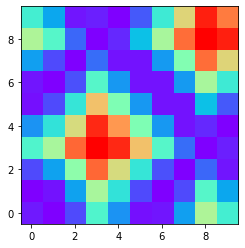

In [14]:
if len(cols) == 1:
    plt.imshow(x[0], cmap='rainbow', origin='lower')
else:
    plt.imshow(x[0,0], cmap='rainbow', origin='lower')

In [15]:
if len(cols) == 1:
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=20, kernel_size=2, input_shape=[10, 10]),
        tf.keras.layers.Dense(units=100),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
else:
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=20, kernel_size=2, input_shape=[len(cols), 10, 10]),
    #     tf.keras.layers.Conv2D(filters=40, kernel_size=2),
    #     tf.keras.layers.Conv2D(filters=80, kernel_size=2),
        tf.keras.layers.Dense(units=100),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

In [16]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
epochs = 200
history = model.fit(x, y, validation_data=(x_test, y_test), batch_size=1000, epochs=epochs, verbose=2)

Train on 8801 samples, validate on 3761 samples
Epoch 1/200
8801/8801 - 0s - loss: 0.6017 - accuracy: 0.6979 - val_loss: 0.6003 - val_accuracy: 0.6894
Epoch 2/200
8801/8801 - 0s - loss: 0.6022 - accuracy: 0.6953 - val_loss: 0.6001 - val_accuracy: 0.7054
Epoch 3/200
8801/8801 - 0s - loss: 0.6023 - accuracy: 0.6904 - val_loss: 0.6001 - val_accuracy: 0.6974
Epoch 4/200
8801/8801 - 0s - loss: 0.6007 - accuracy: 0.6992 - val_loss: 0.6007 - val_accuracy: 0.6894
Epoch 5/200
8801/8801 - 0s - loss: 0.6011 - accuracy: 0.7017 - val_loss: 0.6009 - val_accuracy: 0.7051
Epoch 6/200
8801/8801 - 0s - loss: 0.6010 - accuracy: 0.7025 - val_loss: 0.6015 - val_accuracy: 0.6974
Epoch 7/200
8801/8801 - 0s - loss: 0.6013 - accuracy: 0.7025 - val_loss: 0.6026 - val_accuracy: 0.6658
Epoch 8/200
8801/8801 - 0s - loss: 0.6019 - accuracy: 0.7000 - val_loss: 0.5994 - val_accuracy: 0.7049
Epoch 9/200
8801/8801 - 0s - loss: 0.6005 - accuracy: 0.7015 - val_loss: 0.6007 - val_accuracy: 0.7051
Epoch 10/200
8801/8801 - 

Epoch 80/200
8801/8801 - 0s - loss: 0.5951 - accuracy: 0.7040 - val_loss: 0.5950 - val_accuracy: 0.7051
Epoch 81/200
8801/8801 - 0s - loss: 0.5950 - accuracy: 0.7063 - val_loss: 0.5957 - val_accuracy: 0.7051
Epoch 82/200
8801/8801 - 0s - loss: 0.5952 - accuracy: 0.6984 - val_loss: 0.6006 - val_accuracy: 0.6969
Epoch 83/200
8801/8801 - 0s - loss: 0.5963 - accuracy: 0.7041 - val_loss: 0.6023 - val_accuracy: 0.6969
Epoch 84/200
8801/8801 - 0s - loss: 0.5988 - accuracy: 0.7005 - val_loss: 0.5988 - val_accuracy: 0.7128
Epoch 85/200
8801/8801 - 0s - loss: 0.5970 - accuracy: 0.7030 - val_loss: 0.5969 - val_accuracy: 0.7049
Epoch 86/200
8801/8801 - 0s - loss: 0.5962 - accuracy: 0.6983 - val_loss: 0.5963 - val_accuracy: 0.7131
Epoch 87/200
8801/8801 - 0s - loss: 0.5954 - accuracy: 0.7011 - val_loss: 0.5982 - val_accuracy: 0.6969
Epoch 88/200
8801/8801 - 0s - loss: 0.5969 - accuracy: 0.6963 - val_loss: 0.5996 - val_accuracy: 0.6892
Epoch 89/200
8801/8801 - 0s - loss: 0.5980 - accuracy: 0.6942 - 

Epoch 159/200
8801/8801 - 0s - loss: 0.5941 - accuracy: 0.7025 - val_loss: 0.5948 - val_accuracy: 0.6972
Epoch 160/200
8801/8801 - 0s - loss: 0.5939 - accuracy: 0.7020 - val_loss: 0.5924 - val_accuracy: 0.6972
Epoch 161/200
8801/8801 - 0s - loss: 0.5935 - accuracy: 0.7086 - val_loss: 0.5944 - val_accuracy: 0.7054
Epoch 162/200
8801/8801 - 0s - loss: 0.5951 - accuracy: 0.6974 - val_loss: 0.5960 - val_accuracy: 0.7131
Epoch 163/200
8801/8801 - 0s - loss: 0.5944 - accuracy: 0.6956 - val_loss: 0.5946 - val_accuracy: 0.6894
Epoch 164/200
8801/8801 - 0s - loss: 0.5925 - accuracy: 0.6987 - val_loss: 0.5928 - val_accuracy: 0.6894
Epoch 165/200
8801/8801 - 0s - loss: 0.5932 - accuracy: 0.6991 - val_loss: 0.5946 - val_accuracy: 0.7128
Epoch 166/200
8801/8801 - 0s - loss: 0.5938 - accuracy: 0.6992 - val_loss: 0.5961 - val_accuracy: 0.7208
Epoch 167/200
8801/8801 - 0s - loss: 0.5960 - accuracy: 0.6957 - val_loss: 0.5951 - val_accuracy: 0.6974
Epoch 168/200
8801/8801 - 0s - loss: 0.5967 - accuracy:

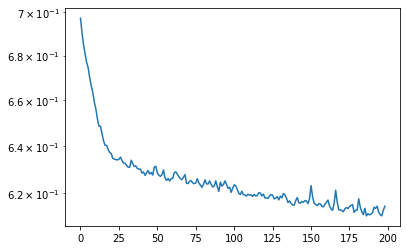

In [18]:
#history.history = hist_info
start_epoch = 0
end_epoch = -1

plt.plot(history.history['loss'][start_epoch:end_epoch])
plt.yscale('log')

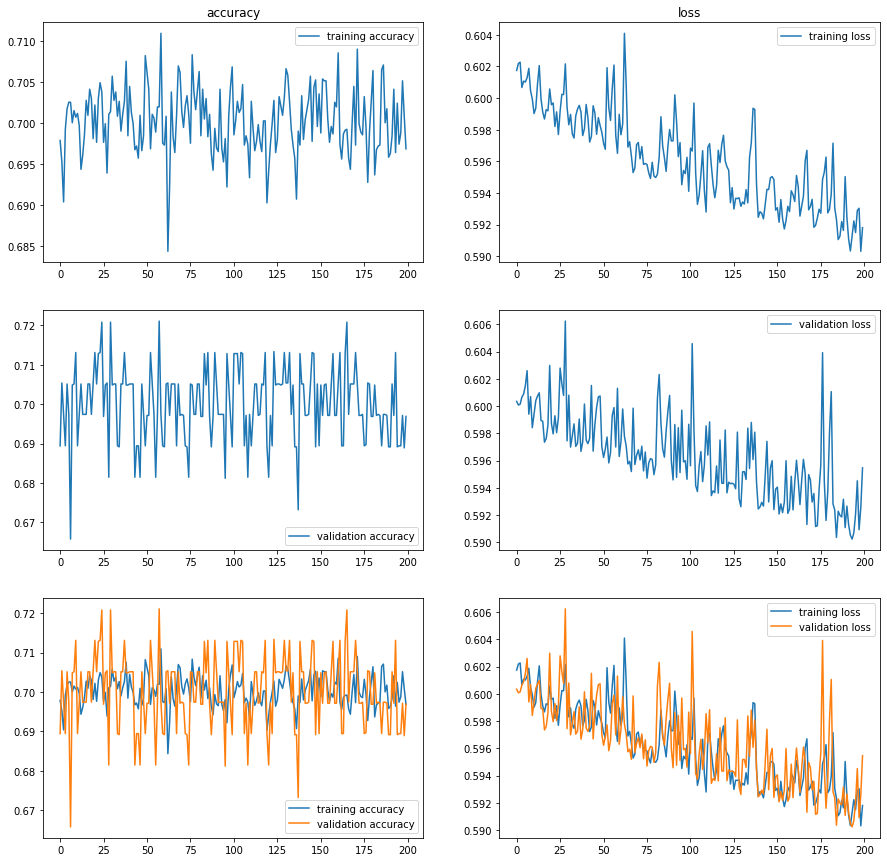

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

metric = 'accuracy'
epoch_show_from = int(epochs * 0)
# metric
ax[0][0].plot(history.history[metric][epoch_show_from:])
ax[0][0].legend([f'training {metric}'])
ax[0][0].set_title(metric)
# loss
ax[0][1].plot(history.history['loss'][epoch_show_from:])
ax[0][1].legend([f'training loss'])
ax[0][1].set_title('loss')

# metric
ax[1][0].plot(history.history[f'val_{metric}'][epoch_show_from:])
ax[1][0].legend([f'validation {metric}'])
ax[2][0].plot(history.history[metric][epoch_show_from:])
ax[2][0].plot(history.history[f'val_{metric}'][epoch_show_from:])
ax[2][0].legend([f'training {metric}',f'validation {metric}'])

# loss
ax[1][1].plot(history.history[f'val_loss'][epoch_show_from:])
ax[1][1].legend([f'validation loss'])
ax[2][1].plot(history.history['loss'][epoch_show_from:])
ax[2][1].plot(history.history[f'val_loss'][epoch_show_from:])
ax[2][1].legend([f'training loss',f'validation loss'])

In [26]:
def create_review_data_set(review_set):
    if review_set == 'train':
        review_x_data = x 
        review_y_data = y
        review_y_pct_diff = y_pct_diff
    elif review_set == 'test':
        review_x_data = x_test
        review_y_data = y_test
        review_y_pct_diff = y_test_pct_diff
    elif review_set == 'all':
        review_x_data = np.concatenate([x, x_test],axis=0)
        review_y_data = np.concatenate([y, y_test],axis=0)
        review_y_pct_diff = np.concatenate([y_pct_diff, y_test_pct_diff],axis=0)
    return review_x_data, review_y_data, review_y_pct_diff

def format_predictions_tanh(review_x_data):
    raw_predictions = model.predict(review_x_data)
    predictions_tanh = np.where(raw_predictions.flatten() < 0.5, -1, 1) 
    return raw_predictions, predictions_tanh

def cut_off_start_review_data_for_prediction():
    # cut off start of raw data until first prediction candle
    if review_set == 'train':
        review_data_raw = train_data_raw[window + num_bars -1:]
    elif review_set == 'test':
        review_data_raw = test_data_raw[window + num_bars -1:]
    elif review_set == 'all':
        review_data_raw = np.concatenate([train_data_raw[window + num_bars -1:], test_data_raw[window + num_bars -1:]],axis=0)
    
    if len(cols) != 1:
        review_data_raw = review_data_raw[:,-1]   
    
    return review_data_raw

def see_predictions(review_set): 
    review_x_data, review_y_data, review_y_pct_diff = create_review_data_set(review_set)
    raw_predictions, predictions_tanh = format_predictions_tanh(review_x_data)
    review_data_raw = cut_off_start_review_data_for_prediction()
    return review_data_raw, review_x_data, review_y_data, review_y_pct_diff, raw_predictions, predictions_tanh

pip_fees = 0
review_set = 'test' #'test' 'train' 'all'
dataset_type = 'stock'

review_data_raw, review_x_data, review_y_data, review_y_pct_diff, raw_predictions, predictions_tanh = see_predictions(review_set)

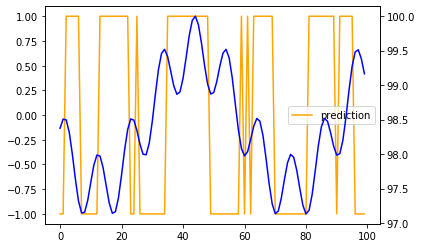

-1 to 1 range: 2


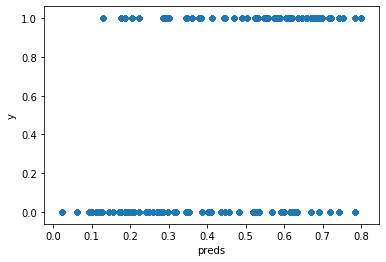

In [27]:
def plot_preds(bars_to_plot):
    fig, ax1 = plt.subplots()
    ax1.plot(predictions_tanh[:bars_to_plot], c='orange')
    ax1.legend(['prediction'])
    ax2 = ax1.twinx()
    ax2.plot(review_data_raw[:bars_to_plot], c='blue')
    #ax2.plot(review_ data_raw[input_len + num_bars: input_len + num_bars + bars_to_plot], c='blue')
    plt.show()
    smallest, biggest = predictions_tanh.min(), predictions_tanh.max()
    print(smallest,'to', biggest, 'range:', biggest - smallest )

bars_to_plot = 100
plot_preds(bars_to_plot)

preds = model.predict(x_test)
my_stuff = pd.DataFrame(pd.Series(preds.flatten(), name='preds'))
my_stuff['y'] = y_test
my_stuff.plot.scatter('preds','y')

avg_profit (0 pip fees) 0.0015118290340482667
best possible profit (0 pip fees) 0.006247819093644122


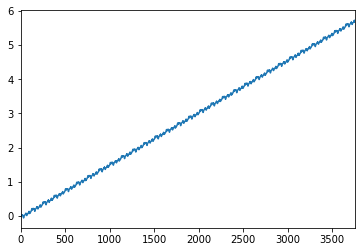

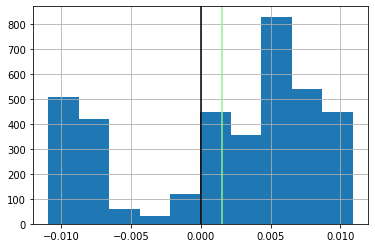

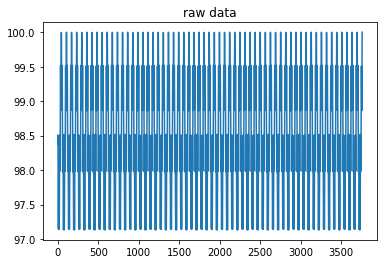

In [28]:
def calc_returns(review_data_raw, predictions_tanh, raw_predictions, review_y_pct_diff, pip_fees=1):
    returns = pd.DataFrame(pd.Series(review_data_raw, name='test_data_raw'))
    returns['y_pct_diff'] = review_y_pct_diff
    returns['predictions_tanh'] = pd.Series(predictions_tanh.flatten())
    returns['raw_predictions'] = pd.Series(raw_predictions.flatten())
        
    longs = returns.query('predictions_tanh > 0')
    flat = returns.query('predictions_tanh == 0')
    shorts = returns.query('predictions_tanh < 0')
    returns.loc[longs.index, 'profit'] = returns.loc[longs.index,'y_pct_diff'] - (0.0001 * pip_fees)
    returns.loc[flat.index, 'profit'] = 0
    returns.loc[shorts.index, 'profit'] = -returns.loc[shorts.index,'y_pct_diff'] - (0.0001 * pip_fees)
    returns['returns'] = returns['profit'].cumsum()
    avg_profit = returns['profit'].mean()
    print(f'avg_profit ({pip_fees} pip fees)',avg_profit)
    print(f'best possible profit ({pip_fees} pip fees)',returns['y_pct_diff'].abs().mean())
        
    return avg_profit, returns

def plot_returns():
    returns['returns'].plot()
    plt.show()
    ##
    ax = returns['profit'].hist()
    ax.axvline(0, c='k')
    ax.axvline(avg_profit, c='lightgreen')
    plt.show()
    
review_data_raw = review_data_raw.flatten()
avg_profit, returns = calc_returns(review_data_raw, predictions_tanh, raw_predictions, review_y_pct_diff, pip_fees=pip_fees)
plot_returns()

plt.plot(review_data_raw)
plt.title('raw data')
plt.show()

### Example

In [21]:
# Parameters
X, _, _, _ = load_gunpoint(return_X_y=True)
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=10, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=10, method='difference')
X_gadf = gadf.fit_transform(X)

C:\Users\Jameshuckle\AppData\Roaming\Python\Python37\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


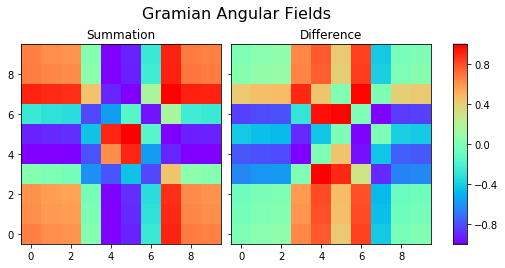

In [22]:
# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[1], X_gadf[1]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()